In [1617]:
data['pop/Km2']

bairros
abolição             4223.368640
alto da boa vista      59.722484
anchieta             3028.722251
anil                 1515.250780
bangu                1718.224490
                        ...     
vila da penha        3772.334447
vila isabel          5570.810890
vila militar          326.958725
vila valqueire       1712.814771
vista alegre         3332.627783
Name: pop/Km2, Length: 111, dtype: float64

In [1626]:
teste = pd.merge(hoods, pops[['bairros','Total_x']], on='bairros')

In [1631]:
teste['pop_dens'] = teste['Total_x']/teste['area']*1000000

In [1632]:
teste[['pop_dens']].describe()

,pop_dens
count,125.000000
mean,11693.689301
std,8198.490444
min,17.397960
25%,6696.777850
50%,11778.208027
75%,14838.653226
max,48257.899437


In [1633]:
data[['pop/Km2']].describe()

,pop/Km2
count,111.000000
mean,2606.608358
std,1841.235828
min,22.799340
25%,1477.493299
50%,2534.292054
75%,3255.047405
max,12085.348857


# Importing

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [1152]:
import folium

In [2]:
pd.set_option('display.max_rows', 500)

# Functions Definition

In [1253]:
def plot_map(df, zoom=10, dot_size=3):                                                               # This function receives a dataframe with latitudes and longitudes values and plot a map
                                                                                                     #  marking the coordinates as dots. Initial zoom and dot size can be inputted to the function as well.
    mapa = folium.Map(location = [-22.91, -43.4], zoom_start = zoom, width='50%', height='50%')      # Creates Map Instance

    for lat, lng, label in zip(df['lat'].values, df['lng'].values, df.iloc[:, 0].values):        # Loop through the coordinates. The coordinates columns must be named as 'lat' and 'lng'.
    
        #label = folium.Popup(label, html_parser=True)
        folium.CircleMarker([lat, lng],                    # Marks the coordinates as circles for each row of the dataframe
                            #popup=label,
                            radius=dot_size,
                            color='darkred',
                            #fill=True,
                            #fill_color='blue',
                            #fill_oppacity=0.8
                           ).add_to(mapa)                 # Add the mark to the map
    
    return mapa    # Display map

# Loading 

### Neighborhoods Data

In [1194]:
hoods = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Outside Data/Clean/complete_bairros_fixed.csv')

### Gyms Data

In [1643]:
gyms = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Search Results\\gyms\\gym_search.csv')

### Population Data

In [911]:
pops = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\Clean\\economia\\pops_clean_fixed.csv', index_col=0)

# Cleaning

In [ ]:
pops['Bairros'][114] = 'freguesia (ilha do governador)'         # Corrections of some neighborhoods names.
pops['Bairros'][151] = 'freguesia (jacarepaguá)'
pops['Bairros'][17] = 'imperial de são cristóvão'

In [1625]:
pops.rename(columns={'Bairros':'bairros'}, inplace=True)

# Summing Neighborhood Population Measures from age 16 to 29.

In [913]:
young = pd.concat([pops['Bairros'], pops[[ '16 e 17 anos', '18 e 19 anos', '20 a 24 anos', '25 a 29 anos']].T.sum().T], axis=1)    # Summing up the columns containing the population of each age group.

In [914]:
young.columns = ['bairros', 'target pop']    # Change this name to target pop

# Merging Gyms and Neighborhoods Tables

In [915]:
gym = gyms.groupby('bairros').count()['id'].reset_index()          # Counting the number of gyms in each neighborhood

In [916]:
gym = pd.merge(gym, hoods[['bairros', 'area']], on='bairros')      # Merging the neighborhoods table with the gyms table on the column containing the neighborhoods names.

# Feature Engineering: Number of gyms per square kilometer

In [917]:
gym['gym/Km2'] = gym['id']/gym['area']*1000000               # Calculating the number of gyms per Km².

In [918]:
gym.rename(columns={'id':'gyms'}, inplace=True)

# Merging with Population Data

In [919]:
data = pd.merge(gym, young, on='bairros').set_index('bairros')        # Merging the previous combined table with the table containing the population data.

# Feature Engineering: Population per square kilometer and number of gyms per 10000 inhabitants

In [920]:
data['pop/Km2'] = (data['target pop'] / data['area']) * 1000000    # Calculating number of inhabitants between ages 16 and 29.

In [921]:
data['gym/pop'] = (data['gyms'] / data['target pop']) * 10000      # Calculating the number of gyms per 10000 inhabitants

# Saving/Loading Complete Table

In [922]:
#data.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\rio dataframes\\gyms_complete.csv')

In [1285]:
data = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\rio dataframes\\gyms_complete.csv', index_col=0)

In [1286]:
data.head()

,gyms,area,gym/Km2,target pop,pop/Km2,gym/pop
bairros,,,,,,
abolição,2,6.163327e+05,3.245001,2603.0,4223.368640,7.683442
alto da boa vista,8,3.149568e+07,0.254003,1881.0,59.722484,42.530569
anchieta,9,4.345727e+06,2.071000,13162.0,3028.722251,6.837867
anil,8,3.500411e+06,2.285446,5304.0,1515.250780,15.082956
bangu,14,3.596620e+07,0.389254,61798.0,1718.224490,2.265445


# Mapping

### Neighborhoods

In [ ]:
plot_map(hoods)

### Gyms

In [ ]:
plot_map(gyms, dot_size=1)

# Variables Distributions

In [1288]:
sns.set_context('notebook')     # Setting plot configuration for entire notebook.
sns.set_style('whitegrid')
sns.set_palette('rainbow')

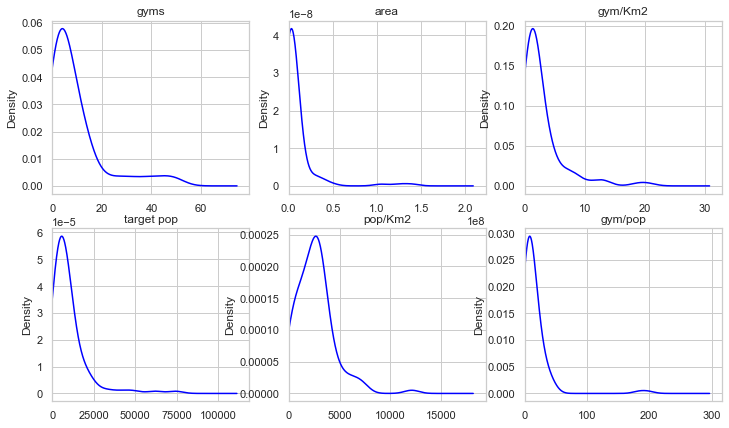

In [1289]:
fig = plt.figure(figsize=(12,7))
axes = [fig.add_subplot(2,3,i) for i in range(1, 7)]

for i in range(1,7):
    
    data.iloc[:, i-1].plot(kind='kde', ax=axes[i-1], xlim=(0), title=data.columns[i-1], color='blue')       # Plotting kernel density estimate function for each feature in the dataframe

# Statistical Summary

In [1290]:
data.describe()

,gyms,area,gym/Km2,target pop,pop/Km2,gym/pop
count,111.000000,1.110000e+02,111.000000,111.000000,111.000000,111.000000
mean,9.270270,8.776519e+06,2.744109,9760.657658,2606.608358,14.705514
std,11.357773,2.096933e+07,3.521853,11317.111950,1841.235828,26.056847
min,1.000000,5.152091e+05,0.055980,202.000000,22.799340,0.575738
25%,2.000000,1.633816e+06,0.797176,3226.500000,1477.493299,4.243579
50%,5.000000,2.960855e+06,1.634244,6782.000000,2534.292054,7.029877
75%,11.000000,5.133511e+06,3.267970,10683.500000,3255.047405,15.421221
max,50.000000,1.395012e+08,20.557196,74168.000000,12085.348857,198.019802


# Exploratory Visualization Analysis

### Sorted bar plot

In [ ]:
fig = plt.figure(figsize=(12,8))
axes = [fig.add_subplot(2,3,i+1) for i in range(6)]

for i in range(6):
    data.iloc[:, [i]].sort_values(by=data.columns[i], ascending=False).plot.bar(ax=axes[i], xticks=[])
    #axes[i].set_xticks([])

### Bar Plots following sorted gyms index

In [ ]:
fig = plt.figure(figsize=(12,8))
axes = [fig.add_subplot(2,3,i+1) for i in range(6)]

gym_index = data['gyms'].sort_values(ascending=False).index

for i in range(data.shape[1]):
    data.iloc[:, i][gym_index].plot.bar(ax=axes[i], legend=True)
    axes[i].set_xticks([])

#### Here we can see that these are not factors that usually drive investors to choose the location of their gyms.

### Pair Plot

In [ ]:
sns.pairplot(data)             

### Original Features 3D Plot

In [166]:
from mpl_toolkits.mplot3d import Axes3D

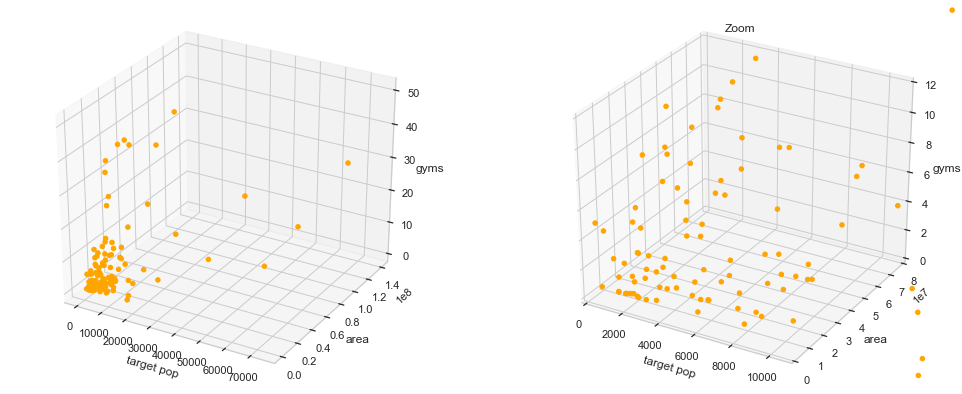

In [242]:
xs = data['target pop']                 # Selecting the original features for plotting
ys = data['area']
zs = data[['gyms']]

fig = plt.figure(figsize=(17,7))                   # Setting figure and figure size
ax1 = fig.add_subplot(121, projection='3d')        # Setting two 3D subplots (Note that the first one is 'ax1' and the second 'ax0')
ax0 = fig.add_subplot(122, projection='3d')

ax0.scatter(xs, ys, zs, alpha=1, color='orange')      # Plotting two equal 3D scatter plot
ax1.scatter(xs, ys, zs, alpha=1, color='orange')

ax0.set_xlim(0, 11000)      # Setting the limits in order to visualize the points close to the origin more closely.
ax0.set_zlim(0, 12)
ax0.set_ylim(0, 1e8*0.8)

ax0.set_xlabel('target pop', fontsize=12)         # Setting labels
ax0.set_ylabel('area', fontsize=12)
ax0.set_zlabel('gyms', fontsize=12)
ax0.set_title('Zoom')

ax1.set_xlabel('target pop', fontsize=12)
ax1.set_ylabel('area', fontsize=12)
ax1.set_zlabel('gyms', fontsize=12)

plt.show()

### Engineered Features 3D Plot

Text(0.5, 0, 'gym/pop')

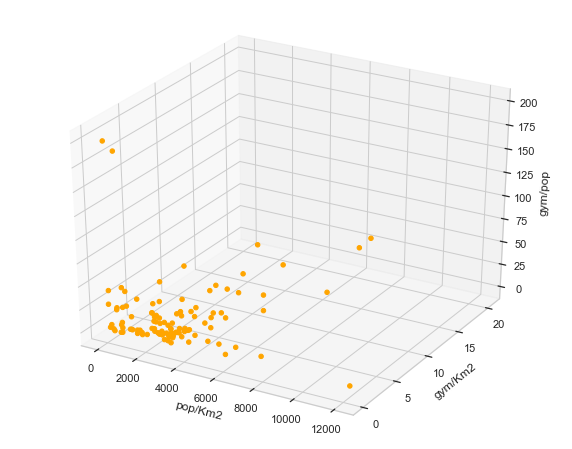

In [243]:
xs = data[['pop/Km2']]     # Setting engineered variables for plotting
ys = data[['gym/Km2']]
zs = data[['gym/pop']]

fig = plt.figure(figsize=(10,8))                 # Creating figure instance and 3D subplot
ax0 = fig.add_subplot(111, projection='3d')

ax0.scatter(xs, ys, zs=zs, alpha=1, color='orange')     # Plotting 3D scatter plot

ax0.set_xlabel('pop/Km2', fontsize=12)     # Labels
ax0.set_ylabel('gym/Km2', fontsize=12) 
ax0.set_zlabel('gym/pop', fontsize=12)
#ax0.set_zlim(0, 50)

### 2D Scatter Plot between gyms/population and gyms/Km2

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


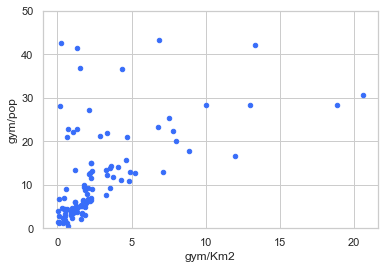

In [824]:
data.plot.scatter('gym/Km2', 'gym/pop', ylim=(0,50))       # The limit is due to outliers messing up the scale.


### Correlation Heatmap

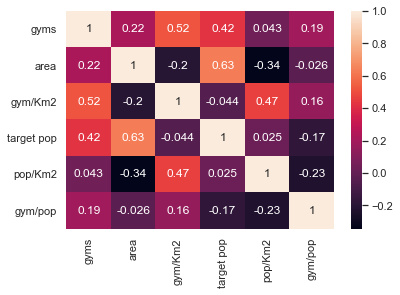

In [244]:
fig, ax0 = plt.subplots()
fig.figsize=(9,9)

sns.heatmap(data.corr(), annot=True, annot_kws=dict(fontsize=12), ax=ax0)
plt.show()

# Feature Transformation and Normalization

In [245]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as ss

### Log Transformation

In [1291]:
log_data = data.apply(np.log1p)    # Applying log transformation to all variables at once.

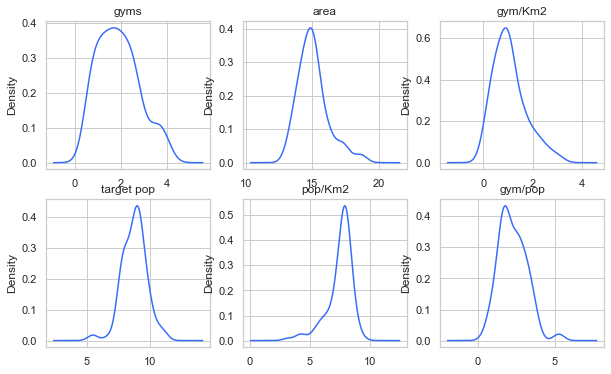

In [1292]:
fig = plt.figure(figsize=(10,6))                                    # Setting figure instance
axes = [fig.add_subplot(2,3,i) for i in range(1, 7)]                # Storing 6 subplots in a list for sequential plotting

for i in range(1,7):     # Looping through subplots in the list
    
    log_data.iloc[:, i-1].plot(kind='kde', ax=axes[i-1], title=data.columns[i-1])            # Plotting kernel density estimate for each subplot in list

### Normalization

In [1293]:
clus_data = pd.DataFrame(ss().fit_transform(log_data), columns=data.columns, index=data.index)      # Applying Normalizating to all variables at once, using standard scaler method 
                                                                                                    # (Subtracting values by the mean and dividing by standard deviation)

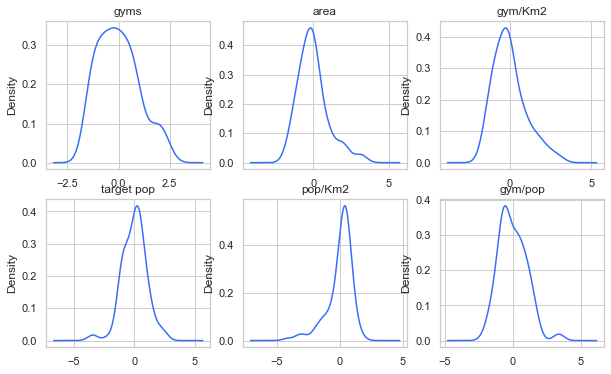

In [1294]:
fig = plt.figure(figsize=(10,6))
axes = [fig.add_subplot(2,3,i) for i in range(1, 7)]

for i in range(1,7):
    
    clus_data.iloc[:, i-1].plot(kind='kde', ax=axes[i-1], title=data.columns[i-1])

#### Note the difference in scale. Also the mean is centered to 0 and standard deviation to 1.

In [1295]:
clus_data.describe()         # To check if all means are 0 and all deviations are 1.

,gyms,area,gym/Km2,target pop,pop/Km2,gym/pop
count,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02
mean,1.880378e-16,1.976397e-15,3.104686e-16,-3.040611e-16,-8.191646e-16,-4.640932e-16
std,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00
min,-1.351576e+00,-1.666548e+00,-1.521308e+00,-3.585295e+00,-4.128956e+00,-2.048819e+00
25%,-8.960616e-01,-6.545031e-01,-7.184248e-01,-6.992316e-01,-2.042224e-01,-6.897066e-01
50%,-1.173540e-01,-1.330875e-01,-1.369213e-01,7.565047e-02,3.083804e-01,-2.079346e-01
75%,6.613535e-01,3.494907e-01,5.938355e-01,5.495868e-01,5.461949e-01,6.005591e-01
max,2.286877e+00,3.245388e+00,3.046594e+00,2.571174e+00,1.792846e+00,3.421093e+00


# K-Means Clustering

##  K-Means Optimization

In [1296]:
scrs = []                          # list to store inertia values for each number of clusters tested.
for i in range(2, 15):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=20).fit(clus_data[['pop/Km2']])      # Calling KMeans method. Clustering by demographic density of target population from 2 to 17 clusters.
    scrs.append([i, kmeans.inertia_])       # Appending inertias

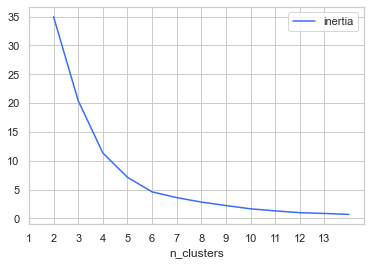

In [1297]:
pd.DataFrame(scrs, columns=['n_clusters', 'inertia']).plot(x='n_clusters', y='inertia', xticks=np.arange(1,14,1))    # Plotting Inertia by number of clusters
plt.show()

## First Clustering: by Demographic Density of Target Population
#### Aiming at high demographic density

In [1298]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=20).fit(clus_data[['pop/Km2']])       # Definitive clustering by demographic density.
data['cluster'] = kmeans.labels_                                                             # Creating new column with clusters labels

## Visualizing First Clustering: Demographic Density

### 3D Scatter Plot

In [1314]:
clusters = data['cluster'].copy()
#colors=[(np.random.random(), np.random.random(), np.random.random()) for i in range(len(clusters.unique()))]

In [1315]:
colors = ['orange', 'blue', 'yellow', 'red', 'green', 'purple']     # Colors to differentiate clusters
colors_dict = {i:j for i,j in zip(range(6), colors)}

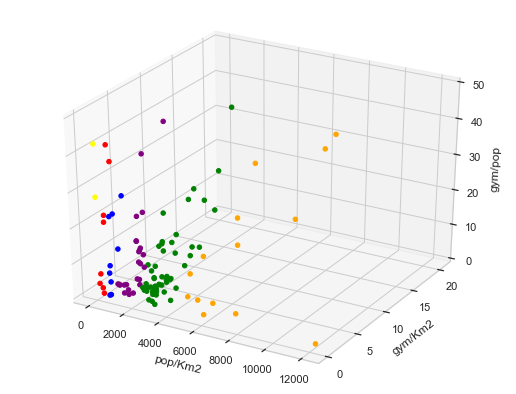

In [1316]:
xs = data[['pop/Km2']]        # Setting variables for 3D Scatter plot
ys = data[['gym/Km2']]
zs = data[['gym/pop']]

fig = plt.figure(figsize=(9,7))                          # Creating figure instance and one subplot
ax0 = fig.add_subplot(111, projection='3d')

ax0.scatter(xs, ys, zs=zs, c=[colors[clusters[i]] for i in range(len(data))], alpha=1)         # Plotting scatter plot. Inputting list of colors matching column containing clusters.

ax0.set_xlabel('pop/Km2', fontsize=12)        # Setting labels
ax0.set_ylabel('gym/Km2', fontsize=12)
ax0.set_zlabel('gym/pop', fontsize=12)
ax0.set_zlim(0, 50)
plt.show()

### 2D Scatter Plot

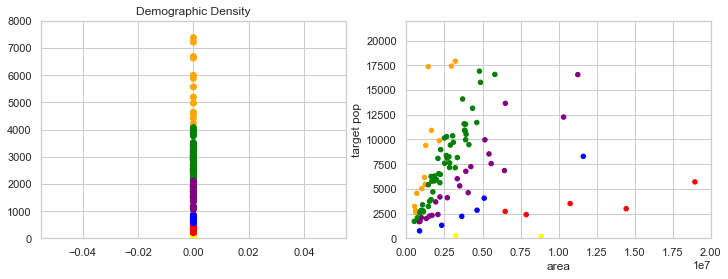

In [1318]:
fig, axes = plt.subplots(1,2, figsize=(12,4))       # Creating figure instance and 2 subplots alligned horizontaly. Passing subplots to array.

axes[0].scatter([0 for i in range(len(data))], data['pop/Km2'], c=[colors[clusters[i]] for i in range(len(data))], alpha=1)    # Plotting scatter plot. X here is a list of zeros in order to display values alligned vertically
axes[0].set_ylim(0,8000)
axes[0].set_title('Demographic Density')

data.plot.scatter(x='area', y='target pop', c=[colors[clusters[i]] for i in range(len(data))], alpha=1, ax=axes[1], xlim=(0, 1e8*0.2), ylim=(0, 22000))    # Limits in order to improve scale due to outliers.

In [1319]:
len(data[data['cluster'].isin([0,4])])     # Checking number of neighborhoods in clusters 0 and 4

65

#### What initially seemed like a bunch of spread out points begins to make more sense.

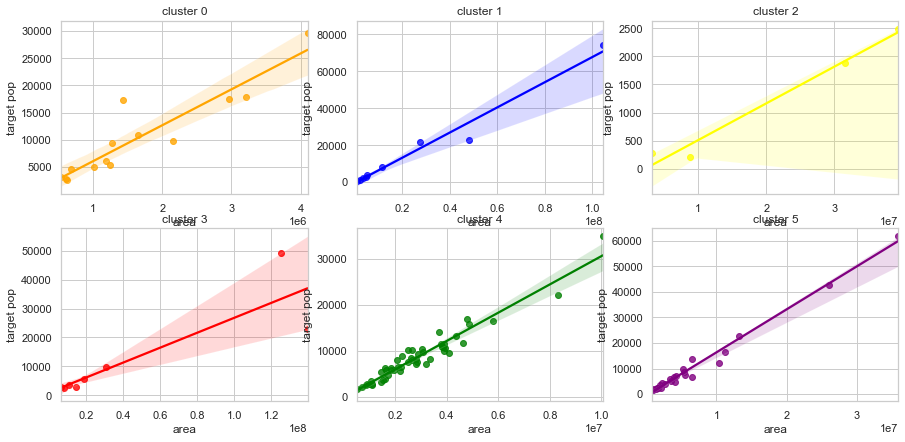

In [1336]:
fig, axes = plt.subplots(2,3,figsize=(15,7))

for i in range(6):    
    sns.regplot(data=data[data['cluster']==i], x='area', y='target pop', color=colors[i], ax=(axes[0][i] if i<3 else axes[1][i-3]))      # Axes is a 2D array. first 3 subplots in first row and last 3 in second row.
    (axes[0][i] if i<3 else axes[1][i-3]).set_title('cluster '+str(i))    # Same logic for axes as before, to set titles.

### Area Plot

#### First clustering excluded neighborhood with low demographic density of the target population

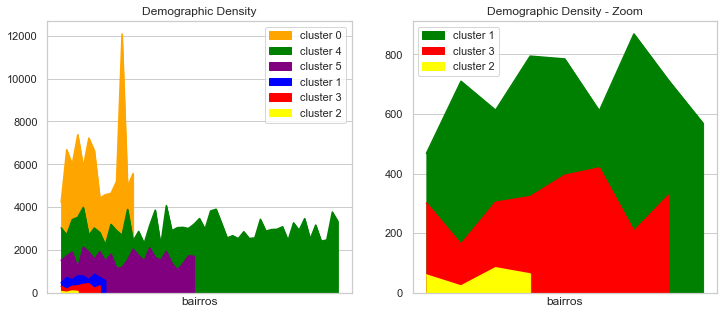

In [1642]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,5))

for i in [0,4,5,1,3,2]:    # Desending order by demographic density. Otherwise the plotting does not work properly.
    data[data['cluster']==i].plot.area(y='pop/Km2', color=colors[i], xticks=[], ax=ax0, label='cluster '+str(i), title='Demographic Density')      


for i, color in zip([1,3,2], ['green', 'red', 'yellow']):
    data[data['cluster']==i].plot.area(y='pop/Km2', color=color, xticks=[], ax=ax1, label='cluster '+str(i), title='Demographic Density - Zoom')
    

In [ ]:
c

### Relationship between number of gyms and demographic density: Scatter Plots

In [1326]:
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.linear_model import LinearRegression as lr

In [1334]:
x = data[~((data['cluster']==0) & (data['gym/Km2']<2.5))][['pop/Km2']]     # Removing outliers from cluster 0 lower then 2.5.
y = data[~((data['cluster']==0) & (data['gym/Km2']<2.5))]['gym/Km2']
x_poly = pf(degree=2).fit_transform(x)   # Using Polynomial Features method to get squared feature. Returns 2D array where each column contains the feature exponentiated by degrees 0 to 2.

lr_obj = lr().fit(x_poly, y)    # Fitting second order regression.

(a1, a2, a3) = lr_obj.coef_     # Getting regression coefficients
b = lr_obj.intercept_

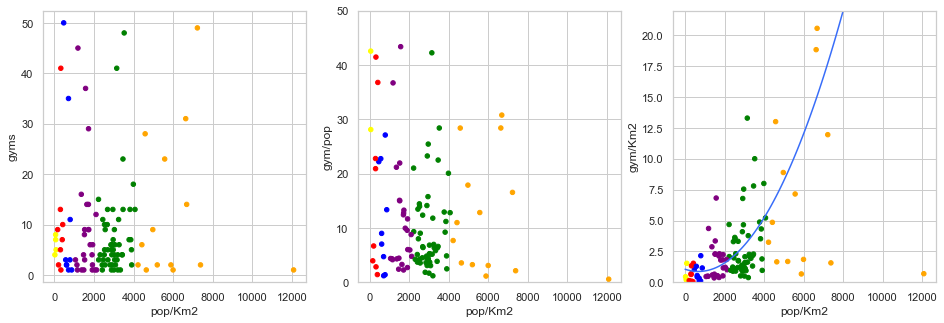

In [1335]:
fig, axes = plt.subplots(1,3,figsize=(16,5))

data.plot.scatter(x='pop/Km2', y='gyms', c=[colors[clusters[i]] for i in range(len(data))], ax=axes[0])
data.plot.scatter(x='pop/Km2', y='gym/pop', c=[colors[clusters[i]] for i in range(len(data))], ax=axes[1], ylim=(0,50))
data.plot.scatter(x='pop/Km2', y='gym/Km2', c=[colors[clusters[i]] for i in range(len(data))], ax=axes[2], ylim=(0,22))
axes[2].plot(x_s, (a1 + a2*x_s + a3*x_s**2 + b))   # Plotting second order regression line

#### Conclusion: No relashionship between demographic density and the actual number of gyms or the number of gyms per 10000 inhabitants of the target population, which is good. It means that we can separate the most populated neighborhoods and from them extract the neighborhoods with low number of gyms or gyms per inhabs.

### We can also see a general tendency of increase in the number of gyms per Km2 when the target population per Km² increases. It looks like a second order relationship with high variance. This points out to one thing: 

## Visualizing First Clustering: Quantity and Density of Gyms

### Relationships: 3D Scatter Plot

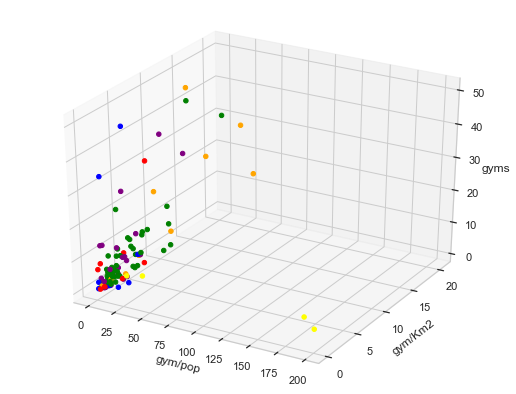

In [1337]:
xs = data[['gym/pop']]
ys = data[['gym/Km2']]
zs = data[['gyms']]

fig = plt.figure(figsize=(9,7))
ax0 = fig.add_subplot(111, projection='3d')

ax0.scatter(xs, ys, zs=zs, c=[colors[clusters[i]] for i in range(len(data))], alpha=1)

ax0.set_xlabel('gym/pop', fontsize=12)
ax0.set_ylabel('gym/Km2', fontsize=12)
ax0.set_zlabel('gyms', fontsize=12)

#ax0.set_xlim(0, 50)

plt.show()

#### Is clear how in general an increase in the number of gyms in a given neighborhood promotes an increase in the density of gyms per area and per target population, although the magnitude of this correlation might no be the same for all neighborhoods. 

### Relationships: 2D Scatter Plot

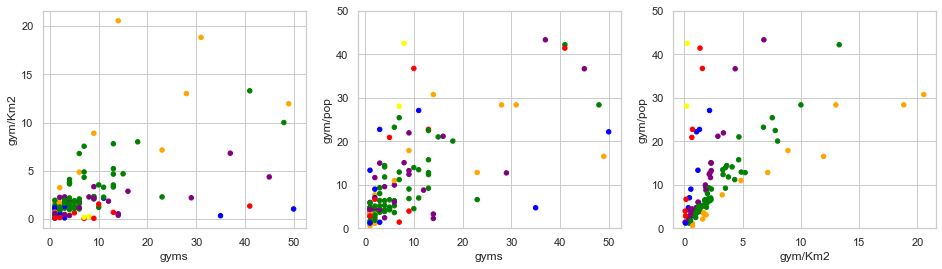

In [1338]:
xs = 'gyms'
ys = 'gym/Km2'
zs = 'gym/pop'

fig, axes = plt.subplots(1,3, figsize=(16, 4))

data.plot.scatter(x=xs, y=ys, c=[colors[clusters[i]] for i in range(len(data))], alpha=1, ax=axes[0])
data.plot.scatter(x=xs, y=zs, c=[colors[clusters[i]] for i in range(len(data))], alpha=1, ax=axes[1], ylim=(0, 50))
data.plot.scatter(x=ys, y=zs, c=[colors[clusters[i]] for i in range(len(data))], alpha=1, ax=axes[2], ylim=(0, 50))


# Visualizing First Clustering: All Variables

### Bar plot

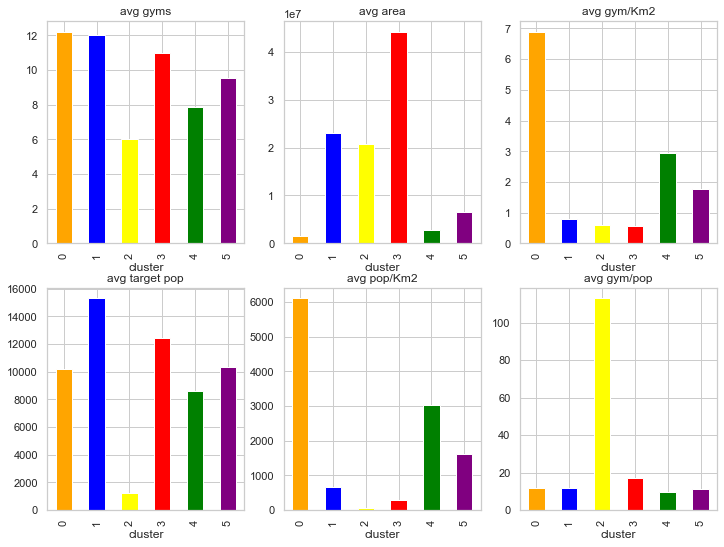

In [1339]:
clus_mean = data.groupby('cluster').mean()

fig = plt.figure(figsize=(12,9))
axes = [fig.add_subplot(2,3,i) for i in range(1, 7)]

for i, col in enumerate(clus_mean):
    clus_mean[col].plot(kind='bar', ax=axes[i], title='avg '+col, color=[colors[j] for j in range(len(clusters.unique()))])

#### We can see that neighborhoods in the clusters 1, 2 and have close area and population values although there is a significant difference in population density between clusters 2 and 3. Even so, the average number of gyms per 10000 inhabitants in this clusters vary greatly. This value for cluster 2 is more than 4 times higher than for cluster 1. This analysis makes cluster 1 the best candidate for a new gym, given that it offers a scarcity of gyms compared to its neighborhoods populations. 

#### It is also Possible to see a correlation between the target population and the number of gyms inside the clusters, as they look similar in this bar plot. This reflects in similarity between demographic density and density of gyms per Km²

### Boxplot

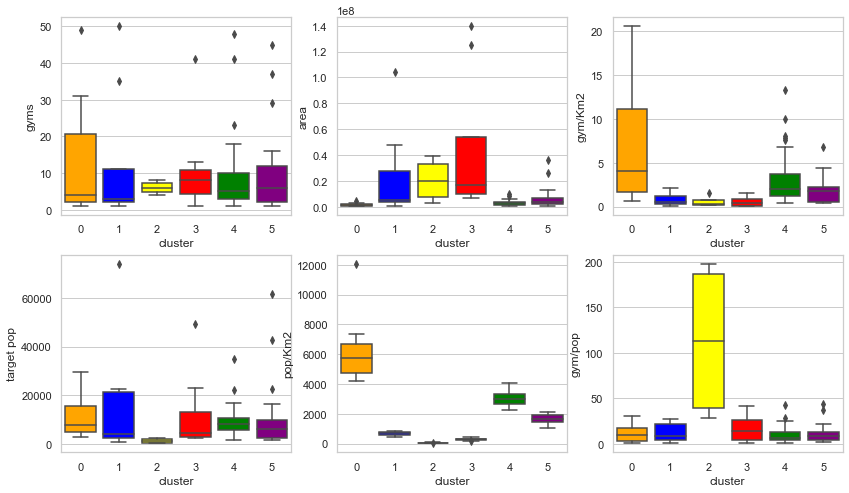

In [1559]:
fig = plt.figure(figsize=(14,8))
axes=[fig.add_subplot(2,3,i+1) for i in range(6)]

for i in range(6):
    
    sns.boxplot(data=data, x='cluster', y=data.columns[i], ax=axes[i])
    
    for j in range(6):
        axes[i].artists[j].set_facecolor(colors[j])    # Setting colors to match clusters colors.

---
# Second Clustering: Clusters 1 and 4
#### Aiming at low competition

In [1568]:
data2 = data[data['cluster'].isin([0])].copy()      # Extracting high demographic density clusters data for further analysis.

In [1569]:
data2['cluster_i'] = data[data['cluster'].isin([0])].copy()['cluster']       # Creating new column to store first clusterig result.

In [1570]:
clus_data2 = clus_data[data['cluster'].isin([0])].copy()    # Extracting high demographic density clusters transformed data for further clustering.
data2.shape

(14, 8)

In [1576]:
len(data2)

14

#### Options reduced to 65 so far

### Optimization

In [1571]:
scrs = []
for i in range(1, 15):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=20).fit(clus_data2[['gym/pop', 'gym/Km2']])     # Same as before but this time by gym density per Km² and 10000 inhabitants of target population
    scrs.append([i, kmeans.inertia_])

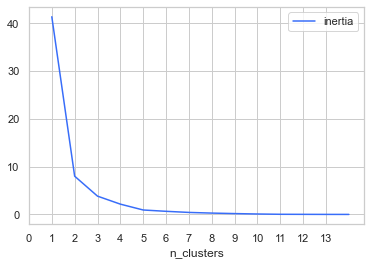

In [1572]:
pd.DataFrame(scrs, columns=['n_clusters', 'inertia']).plot(x='n_clusters', y='inertia', xticks=np.arange(0,14,1))
plt.show()

### Clustering

In [1573]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=20).fit(clus_data2[['gym/pop', 'gym/Km2']])
data2['cluster'] = kmeans.labels_

---
# Visualizing Second Clustering

### 3D Scatter Plots

In [1574]:
clusters2 = data2['cluster'].copy()
colors2 = colors

In [1509]:
#colors2=[(np.random.random(), np.random.random(), np.random.random()) for i in range(len(clusters2.unique()))]

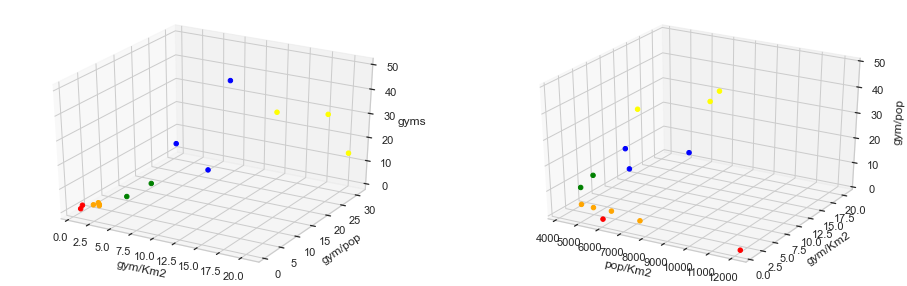

In [1575]:
fig = plt.figure(figsize=(16,5))
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122, projection='3d')

xs = data2[['gym/Km2']]
ys = data2[['gym/pop']]
zs = data2[['gyms']]

ax0.scatter(xs, ys, zs=zs, c=[colors2[clusters2[i]] for i in range(len(data2))], alpha=1)

xs = data2[['pop/Km2']]
ys = data2[['gym/Km2']]
zs = data2[['gym/pop']]

ax1.scatter(xs, ys, zs=zs, c=[colors2[clusters2[i]] for i in range(len(data2))], alpha=1)

ax0.set_xlabel('gym/Km2', fontsize=12)
ax0.set_ylabel('gym/pop', fontsize=12)
ax0.set_zlabel('gyms', fontsize=12)

ax1.set_xlabel('pop/Km2', fontsize=12)
ax1.set_ylabel('gym/Km2', fontsize=12)
ax1.set_zlabel('gym/pop', fontsize=12)
ax1.set_zlim(0, 50)

plt.show()

#### Is clear how in general an increase in the number of gyms in a given neighborhood promotes an increase in the density of gyms per area and per target population, although the magnitude of this correlation might no be the same for all gyms (plot 1). 

#### Conclusion: We can see that we still have a good range of demographic density to choose from, which allows for flexibility when choosing the right neighborhood for the new gym. That is, this final result does not impose only extreme values for demographic density, but rather let us choose exactly what level of density we want, from the group that offers the highest densities (plot2).

In [1512]:
colors_dict

{0: 'orange', 1: 'blue', 2: 'yellow', 3: 'red', 4: 'green', 5: 'purple'}

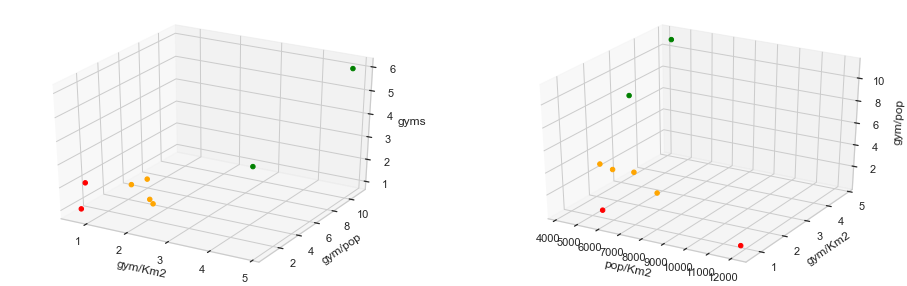

In [1578]:
fig = plt.figure(figsize=(16,5))
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122, projection='3d')

xs = data2[data2['cluster'].isin([4,3,0])][['gym/Km2']]
ys = data2[data2['cluster'].isin([4,3,0])][['gym/pop']]
zs = data2[data2['cluster'].isin([4,3,0])][['gyms']]

ax0.scatter(xs, ys, zs=zs, c=[colors2[clusters2[data2['cluster'].isin([4,3,0])][i]] for i in range(len(data2[data2['cluster'].isin([4,3,0])]))], alpha=1)

xs = data2[data2['cluster'].isin([4,3,0])][['pop/Km2']]
ys = data2[data2['cluster'].isin([4,3,0])][['gym/Km2']]
zs = data2[data2['cluster'].isin([4,3,0])][['gym/pop']]

ax1.scatter(xs, ys, zs=zs, c=[colors2[clusters2[data2['cluster'].isin([4,3,0])][i]] for i in range(len(data2[data2['cluster'].isin([4,3,0])]))], alpha=1)

ax0.set_xlabel('gym/Km2', fontsize=12)
ax0.set_ylabel('gym/pop', fontsize=12)
ax0.set_zlabel('gyms', fontsize=12)

ax1.set_xlabel('pop/Km2', fontsize=12)
ax1.set_ylabel('gym/Km2', fontsize=12)
ax1.set_zlabel('gym/pop', fontsize=12)
#ax1.set_zlim(0, 50)

plt.show()

### 2D Scatter Plots: Relationship Between Gyms Quantities and Densities

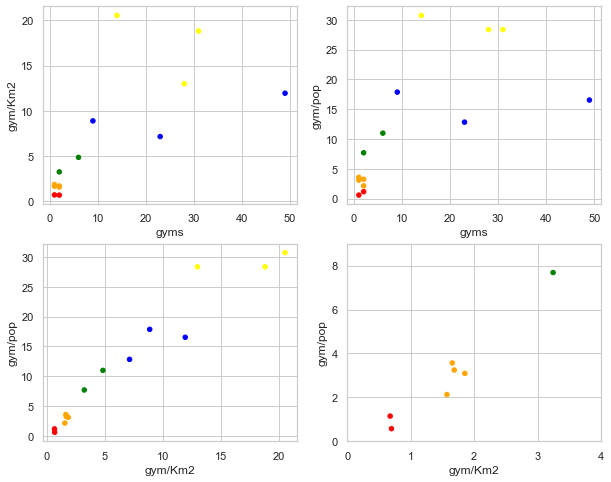

In [1583]:
xs = 'gyms'
ys = 'gym/Km2'
zs = 'gym/pop'

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

data2.plot.scatter(x=xs, y=ys, c=[colors2[clusters2[i]] for i in range(len(data2))], alpha=1, ax=axes[0][0])
data2.plot.scatter(x=xs, y=zs, c=[colors2[clusters2[i]] for i in range(len(data2))], alpha=1, ax=axes[0][1])#, ylim=(0, 50))
data2.plot.scatter(x=ys, y=zs, c=[colors2[clusters2[i]] for i in range(len(data2))], alpha=1, ax=axes[1][0])#, ylim=(0, 50))
data2.plot.scatter(x=ys, y=zs, c=[colors2[clusters2[i]] for i in range(len(data2))], alpha=1, ax=axes[1][1], xlim=(0, 4), ylim=(0, 9))

#### Here it's visible how the isolated group follows a much more clear pattern in terms of the number of gyms. Once we remove neighborhoods with low demographic density, this pattern emerges. 

### 2D Scatter Plots: Relationship Between Presence of Gyms and Demographic Density

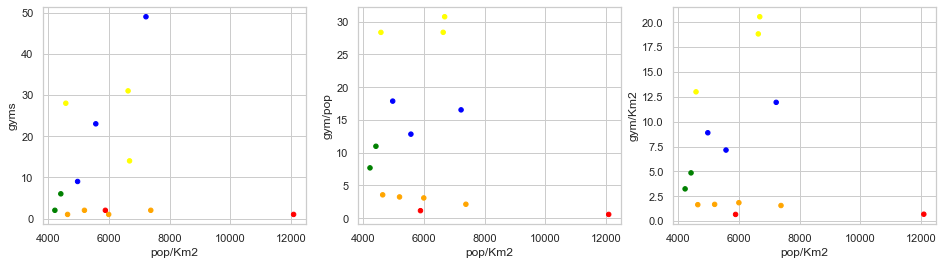

In [1584]:
fig, axes = plt.subplots(1,3,figsize=(16,4))

data2.plot.scatter(x='pop/Km2', y='gyms', c=[colors2[clusters2[i]] for i in range(len(data2))], ax=axes[0])
data2.plot.scatter(x='pop/Km2', y='gym/pop', c=[colors2[clusters2[i]] for i in range(len(data2))], ax=axes[1])
data2.plot.scatter(x='pop/Km2', y='gym/Km2', c=[colors2[clusters2[i]] for i in range(len(data2))], ax=axes[2])

### Linear Relationship of Demographic density on Selected Clusters

In [1516]:
from sklearn.linear_model import LinearRegression as lr

In [1586]:
x_demo = data2['area']
y_demo = data2['target pop']
lr_obj = lr().fit(x_demo.values.reshape(-1, 1), y_demo.values.reshape(-1, 1))

a = lr_obj.coef_
b = lr_obj.intercept_
x_p = np.linspace(0,1e7*1.1, 50)
y_p = (a*x_p + b).ravel()

In [1522]:
x_demo = data2[data2['cluster_i']==0]['area']
y_demo = data2[data2['cluster_i']==0]['target pop']
lr_obj = lr().fit(x_demo.values.reshape(-1, 1), y_demo.values.reshape(-1, 1))

a1 = lr_obj.coef_
b1 = lr_obj.intercept_
x_p1 = np.linspace(0,1e7*1.1, 50)
y_p1 = (a1*x_p1 + b1).ravel()

In [1523]:
x_demo = data2[data2['cluster_i']==4]['area']
y_demo = data2[data2['cluster_i']==4]['target pop']
lr_obj = lr().fit(x_demo.values.reshape(-1, 1), y_demo.values.reshape(-1, 1))

a2 = lr_obj.coef_
b2 = lr_obj.intercept_
x_p2 = np.linspace(0,1e7*1.1, 50)
y_p2 = (a2*x_p2 + b2).ravel()

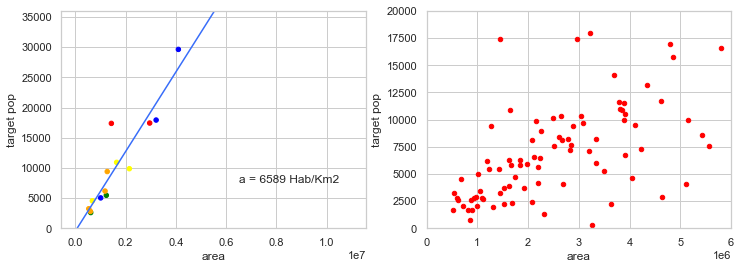

In [1587]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

data2.plot.scatter(x='area', y='target pop', c=[colors2[clusters2[j]] for j in range(len(data2))], ax=axes[0], ylim=(0,36000))
axes[0].plot(x_p, y_p)

#data2.plot.scatter(x='area', y='target pop', c=[colors[data2['cluster_i'][j]] for j in range(len(data2))], ax=axes[1], ylim=(0,36000))
#axes[1].plot(x_p1, y_p1)
#axes[1].plot(x_p2, y_p2)

txt = 'a = '+str(int(a[0][0]*1000000))+' Hab/Km2'
#txt1 = 'a2 = '+str(int(a1[0][0]*1000000))+' Hab/Km2'
#txt2 = 'a1 = '+str(int(a2[0][0]*1000000))+' Hab/Km2'

axes[0].text(1e7*0.65, 7500, s=txt)
#axes[1].text(1e7*0.65, 7500, s=txt1)
#axes[1].text(1e7*0, 32000, s=txt2)

data.plot.scatter(x='area', y='target pop', ax=axes[1], xlim=(0,1e8*0.06), ylim=(0,20000), color='red')

### Demographic Density

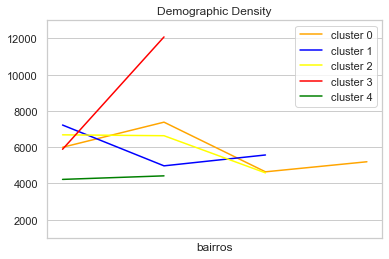

In [1592]:
fig, ax0 = plt.subplots(1,1,figsize=(6,4))

for i in range(5):
    data2[data2['cluster']==i].plot(y='pop/Km2', color=colors2[i], xticks=[], ax=ax0, label='cluster '+str(i), title='Demographic Density', ylim=(1000,13000))


#### Conclusion: for neighborhoods where demographic density is higher than the minimum density in selected clusters, density is more or less constant

# Visualizing Second Clustering: All Variables

### Bar plot

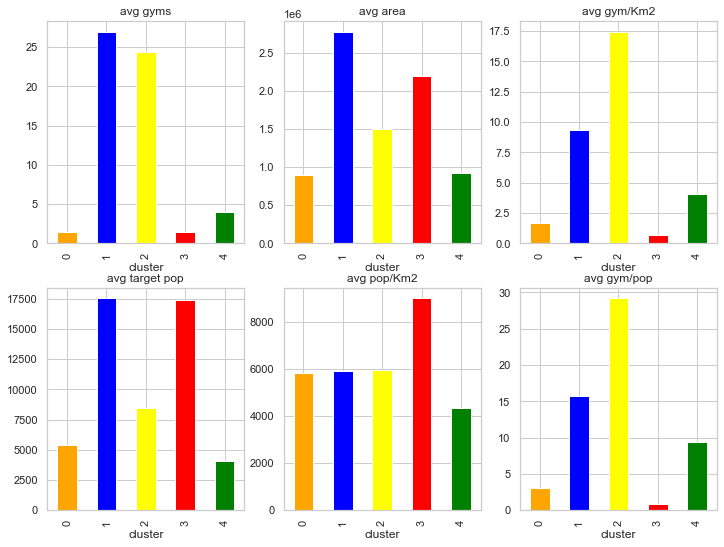

In [1588]:
clus_mean = data2.groupby('cluster').mean().iloc[:,:-1]

fig = plt.figure(figsize=(12,9))
axes = [fig.add_subplot(2,3,i) for i in range(1, 7)]

for i, col in enumerate(clus_mean):
    clus_mean[col].plot(kind='bar', ax=axes[i], title='avg '+col, color=[colors2[j] for j in range(len(clusters2.unique()))])

### Boxplot

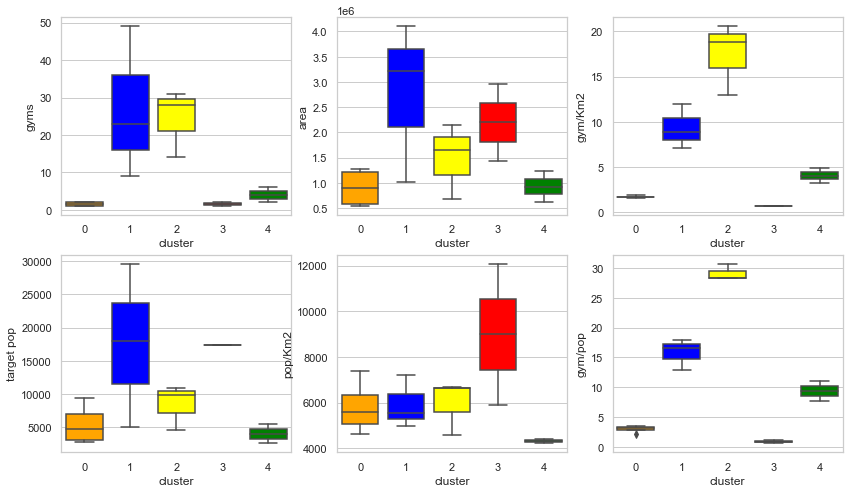

In [1590]:
fig = plt.figure(figsize=(14,8))

axes=[fig.add_subplot(2,3,i+1) for i in range(6)]

for i in range(6):
    
    sns.boxplot(data=data2, x='cluster', y=data2.columns[i], ax=axes[i])
    
    for j in range(5):
        axes[i].artists[j].set_facecolor(colors2[j])

# Final List of Recommended Neighborhoods

In [1593]:
data3 = data2[data2['cluster'].isin([0,4])].copy()
clus_data3 = clus_data2[data2['cluster'].isin([0,4])].copy()

In [ ]:
plot_map(hoods[hoods['bairros'].isin(data3.index)])

In [1594]:
len(data3)

6

In [1538]:
len(data3[data3['cluster']==0]), len(data3[data3['cluster']==4]), len(data3[data3['cluster']==5])

(19, 5, 16)

### These are the neighborhoods which are likely to provide ideal conditions for the construction of a new gym. This is because they offer the lowest numbers of gyms per 10000 inhabitants, fairly low number of gyms per squared kilometer and the highest population densities. This profile suggests that in these neighborhoods investors will find much less competition against other gyms, while also having a much easier time capturing new clients.

#### We can analyse each of these measures seperattely. A low number of gyms per squared kilometer predicts less competition once local prospective clients are less likely to opt for a nearby competitor gym.
#### Similarly, a low number of gyms per 10000 inhabitants decreases competition, once there's more people available 'for each gym'.
#### And finaly, a high population density increases the chance of obtaining new clients and guarantees that the neighborhood population won't be far from the new gym, and instead will be concentrated around it.

# Result Analysis

### 3D Scatter Plots

In [1595]:
data3 = data2[data2['cluster'].isin([0,4])].copy()

In [1615]:
data3

,gyms,area,gym/Km2,target pop,pop/Km2,gym/pop,cluster,cluster_i
bairros,,,,,,,,
abolição,2,6.163327e+05,3.245001,2603.0,4223.368640,7.683442,4,0
catumbi,1,5.394584e+05,1.853711,3234.0,5994.901088,3.092146,0,0
cidade de deus,2,1.273025e+06,1.571061,9397.0,7381.631433,2.128339,0,0
gardênia azul,6,1.236292e+06,4.853224,5463.0,4418.860680,10.982976,4,0
pitangueiras,1,6.041298e+05,1.655273,2804.0,4641.386862,3.566334,0,0
portuguesa,2,1.186409e+06,1.685759,6165.0,5196.351104,3.244120,0,0


In [1596]:
clusters3 = data3['cluster'].copy()

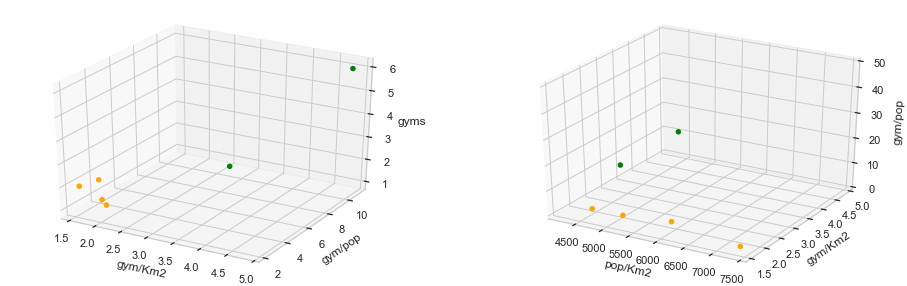

In [1597]:
fig = plt.figure(figsize=(16,5))
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122, projection='3d')

xs = data3[['gym/Km2']]
ys = data3[['gym/pop']]
zs = data3[['gyms']]

ax0.scatter(xs, ys, zs=zs, c=[colors2[clusters3[i]] for i in range(len(data3))], alpha=1)

xs = data3[['pop/Km2']]
ys = data3[['gym/Km2']]
zs = data3[['gym/pop']]

ax1.scatter(xs, ys, zs=zs, c=[colors2[clusters3[i]] for i in range(len(data3))], alpha=1)

ax0.set_xlabel('gym/Km2', fontsize=12)
ax0.set_ylabel('gym/pop', fontsize=12)
ax0.set_zlabel('gyms', fontsize=12)

ax1.set_xlabel('pop/Km2', fontsize=12)
ax1.set_ylabel('gym/Km2', fontsize=12)
ax1.set_zlabel('gym/pop', fontsize=12)
ax1.set_zlim(0, 50)

plt.show()

### 2D Scatter Plots: Relationship Between Gyms Quantities and Densities

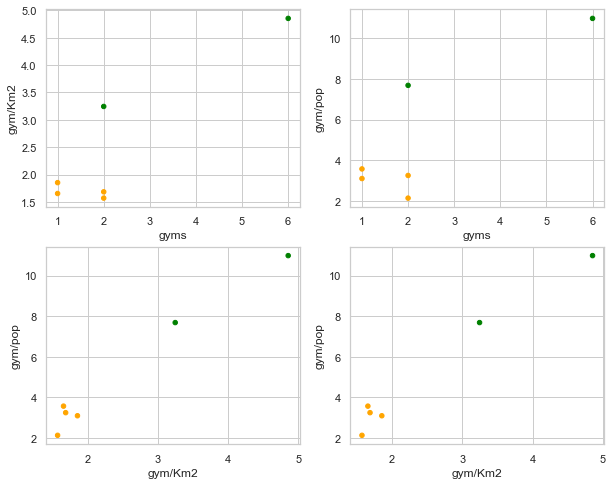

In [1598]:
xs = 'gyms'
ys = 'gym/Km2'
zs = 'gym/pop'

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

data3.plot.scatter(x=xs, y=ys, c=[colors2[clusters3[i]] for i in range(len(data3))], alpha=1, ax=axes[0][0])
data3.plot.scatter(x=xs, y=zs, c=[colors2[clusters3[i]] for i in range(len(data3))], alpha=1, ax=axes[0][1])
data3.plot.scatter(x=ys, y=zs, c=[colors2[clusters3[i]] for i in range(len(data3))], alpha=1, ax=axes[1][0])
data3.plot.scatter(x=ys, y=zs, c=[colors2[clusters3[i]] for i in range(len(data3))], alpha=1, ax=axes[1][1])

#### Here it's visible how the isolated group follows a much more clear pattern in terms of the number of gyms. Once we remove neighborhoods with low demographic density, this pattern emerges. 

### 2D Scatter Plots: Relationship Between Presence of Gyms and Demographic Relationship

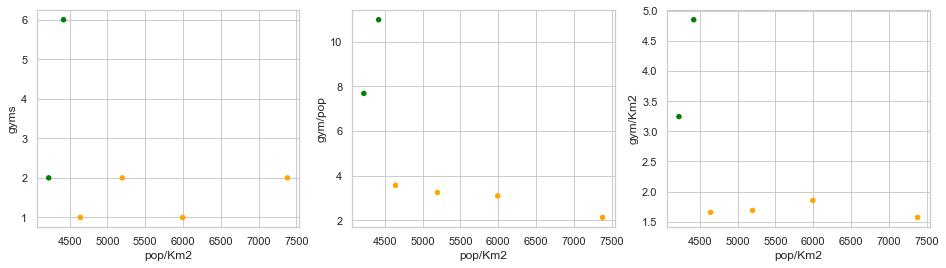

In [1599]:
fig, axes = plt.subplots(1,3,figsize=(16,4))

data3.plot.scatter(x='pop/Km2', y='gyms', c=[colors2[clusters3[i]] for i in range(len(data3))], ax=axes[0])
data3.plot.scatter(x='pop/Km2', y='gym/pop', c=[colors2[clusters3[i]] for i in range(len(data3))], ax=axes[1])
data3.plot.scatter(x='pop/Km2', y='gym/Km2', c=[colors2[clusters3[i]] for i in range(len(data3))], ax=axes[2])

### Linear Relationship of Demographic density on Selected Clusters

In [1600]:
from sklearn.linear_model import LinearRegression as lr

In [1603]:
x_demo = data3['area']
y_demo = data3['target pop']

lr_obj = lr().fit(x_demo.values.reshape(-1, 1), y_demo.values.reshape(-1, 1))

a = lr_obj.coef_
b = lr_obj.intercept_

x_p = np.linspace(0,1e7*0.2, 50)
y_p = (a*x_p + b).ravel()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


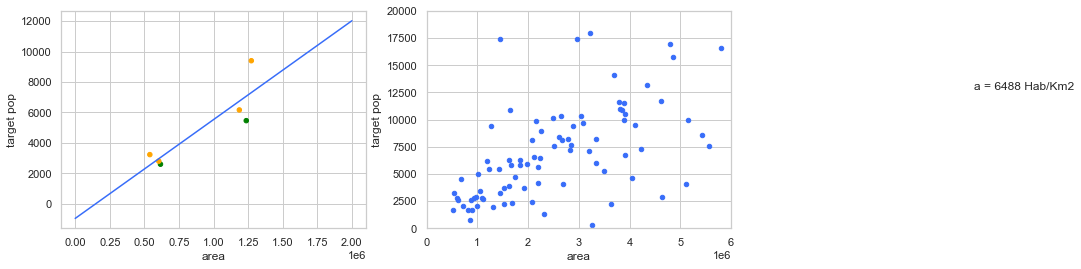

In [1604]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

data3.plot.scatter(x='area', y='target pop', c=[colors2[clusters3[j]] for j in range(len(data3))], ax=axes[0])
axes[0].plot(x_p, y_p)

txt = 'a = '+str(int(a[0][0]*1000000))+' Hab/Km2'
axes[0].text(1e7*0.65, 7500, s=txt)

data.plot.scatter(x='area', y='target pop', ax=axes[1], xlim=(0,1e8*0.06), ylim=(0,20000))

### Demographic Density

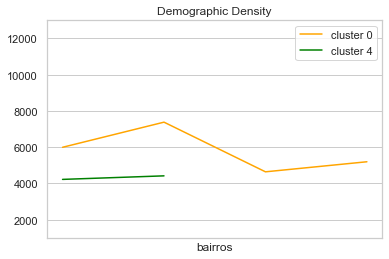

In [1605]:
fig, ax0 = plt.subplots(1,1,figsize=(6,4))

for i in [0,4]:
    data3[data3['cluster']==i].plot(y='pop/Km2', color=colors2[i], xticks=[], ax=ax0, label='cluster '+str(i), title='Demographic Density', ylim=(1000,13000))


#### Conclusion: for neighborhoods where demographic density is higher than the minimum density in selected clusters, density is more or less constant

# Visualizing Second Clustering: All Variables

### Bar plot

In [1606]:
colors2

['orange', 'blue', 'yellow', 'red', 'green', 'purple']

In [1607]:
clusters3.unique()

array([4, 0])

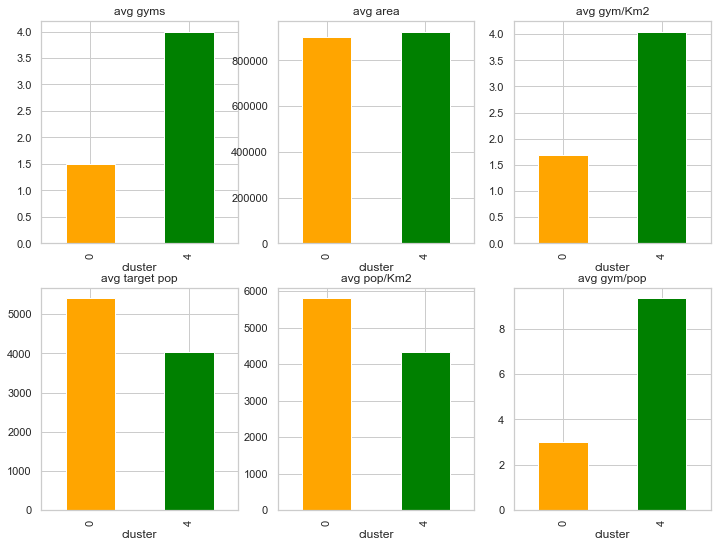

In [1608]:
clus_mean = data3.groupby('cluster').mean()

fig = plt.figure(figsize=(12,9))
axes = [fig.add_subplot(2,3,i) for i in range(1, 7)]

for i, col in zip(range(6), clus_mean):
    clus_mean[col].plot(kind='bar', ax=axes[i], title='avg '+col, color=[colors2[j] for j in sorted(clusters3.unique())])

### Boxplot

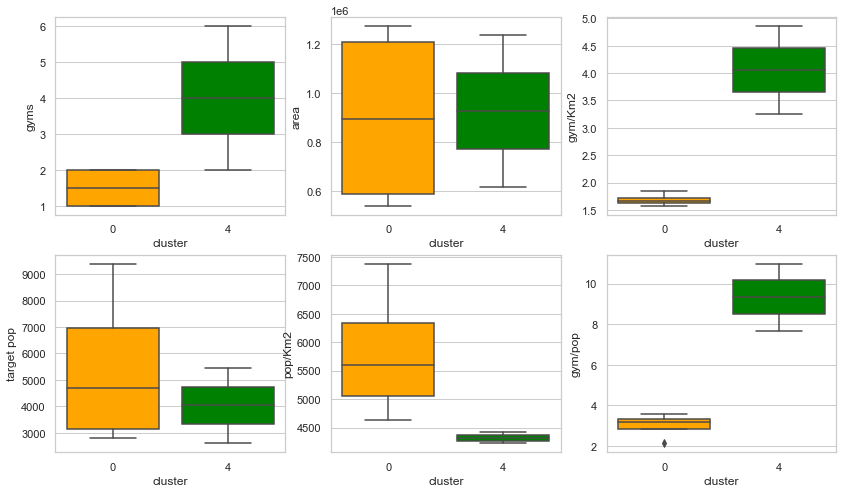

In [1609]:
fig = plt.figure(figsize=(14,8))
axes=[fig.add_subplot(2,3,i+1) for i in range(6)]

for i in range(6):
    
    sns.boxplot(data=data3, x='cluster', y=data3.columns[i], ax=axes[i])
    
    for j,k in zip(range(2), sorted(clusters3.unique())):
        
        axes[i].artists[j].set_facecolor(colors2[k])


In [1634]:
data3


,gyms,area,gym/Km2,target pop,pop/Km2,gym/pop,cluster,cluster_i
bairros,,,,,,,,
abolição,2,6.163327e+05,3.245001,2603.0,4223.368640,7.683442,4,0
catumbi,1,5.394584e+05,1.853711,3234.0,5994.901088,3.092146,0,0
cidade de deus,2,1.273025e+06,1.571061,9397.0,7381.631433,2.128339,0,0
gardênia azul,6,1.236292e+06,4.853224,5463.0,4418.860680,10.982976,4,0
pitangueiras,1,6.041298e+05,1.655273,2804.0,4641.386862,3.566334,0,0
portuguesa,2,1.186409e+06,1.685759,6165.0,5196.351104,3.244120,0,0


# Mapping

In [1610]:
data3_ext = pd.merge(hoods, data3.reset_index().rename(columns={'index':'bairros'}), on='bairros')

In [1635]:
plot_map(data3_ext)

In [1611]:
plot_map(data3_ext[data3_ext['cluster']==0])

In [1612]:
plot_map(data3_ext[data3_ext['cluster']==4])

In [1567]:
plot_map(data3_ext[data3_ext['cluster']==5])